In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
# Load the CIFAR-100 dataset

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

In [5]:
# Confirm that reloading the dataset does not require a download

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

In [6]:
# Examine the shape of the data.

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[41]


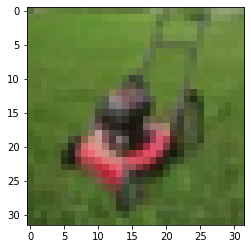

In [7]:
# Examine one of the images and its corresponding label

plt.imshow(train_images[500])
print(train_labels[500])

In [8]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [9]:
# Print a few of the labels

cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [10]:
# Print the corresponding label for the example above

cifar100_fine_labels[41]

'lawn_mower'

#### Load the data using different label modes

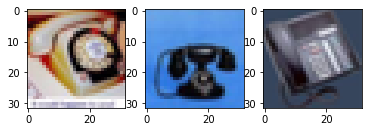

In [11]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [12]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='coarse')

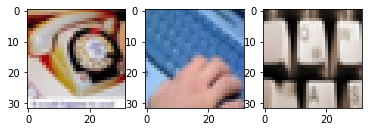

In [13]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [14]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [15]:
# Print a few of the labels

cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [16]:
# Print the corresponding label for the example above

cifar100_coarse_labels[5]

'household electrical device'

#### Load the IMDB Dataset

In [17]:
from tensorflow.keras.datasets import imdb

In [18]:
# Load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

In [19]:
# Print an example from the training dataset, along with its corresponding label

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [20]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [21]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [22]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

# oov_char = out of value character
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2)

In [23]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [24]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [25]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [26]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data)

In [27]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [28]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [30]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

In [31]:
# Print the shape of the DataFrame

fertility.shape

(100, 10)

In [32]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [33]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [34]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [35]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [36]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [37]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,0.33,0.75,1.0,1.0,0.0,0.0,0.8,-1.0,0.38,0.0
1,-0.33,0.50,1.0,1.0,0.0,-1.0,0.8,0.0,0.88,0.0
2,1.00,0.56,0.0,0.0,0.0,1.0,0.8,0.0,1.00,0.0
3,-1.00,1.00,1.0,0.0,1.0,1.0,0.6,0.0,0.25,0.0
4,1.00,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,1.0


In [38]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [39]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.75,1.0,1.0,0.0,0.0,0.8,-1.0,0.38,0.0,0,0,1,0
1,0.50,1.0,1.0,0.0,-1.0,0.8,0.0,0.88,0.0,0,1,0,0
2,0.56,0.0,0.0,0.0,1.0,0.8,0.0,1.00,0.0,0,0,0,1
3,1.00,1.0,0.0,1.0,1.0,0.6,0.0,0.25,0.0,1,0,0,0
4,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,1.0,0,0,0,1


*N.B. The below cell has been updated since the coding tutorial.*

In [40]:
# Move the Output column such that it is the last column in the DataFrame

fertility = fertility.reindex(columns = [col for col in fertility.columns if col != 'Output'] + ['Output'])

In [41]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.75,1.0,1.0,0.0,0.0,0.8,-1.0,0.38,0,0,1,0,0.0
1,0.50,1.0,1.0,0.0,-1.0,0.8,0.0,0.88,0,1,0,0,0.0
2,0.56,0.0,0.0,0.0,1.0,0.8,0.0,1.00,0,0,0,1,0.0
3,1.00,1.0,0.0,1.0,1.0,0.6,0.0,0.25,1,0,0,0,0.0
4,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,0,0,0,1,1.0


In [42]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [43]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [44]:
# Verify the shape of the training data

training.shape

(70, 13)

In [45]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [46]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [47]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [48]:
# Test the generator using the next() function

next(train_generator)

(array([[ 0.75,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 , -1.  ,  0.38,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.5 ,  1.  ,  1.  ,  0.  , -1.  ,  0.8 ,  0.  ,  0.88,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.56,  0.  ,  0.  ,  0.  ,  1.  ,  0.8 ,  0.  ,  1.  ,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.6 ,  0.  ,  0.25,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.69,  1.  ,  0.  ,  1.  , -1.  ,  1.  , -1.  ,  0.44,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  0.8 , -1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.58,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  0.  ,  0.44,  0.  ,
          0.  ,  0.  ,  1.  ],
        [ 0.61,  1.  ,  1.  ,  1.  ,  0.  ,  0.6 , -1.  ,  0.38,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.5 ,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.72,  1.  ,  1.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.19,  0.  ,
 

#### Build the model

In [49]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [50]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               1300      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,849
Trainable params: 1,625
Non-trainable par

#### Compile the model

In [51]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [52]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [53]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [54]:
# Set the epochs to 3

epochs = 3

In [55]:
# Train the model

for epoch in range(epochs):
    train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
    validation_generator= get_generator(validation_features, validation_labels, batch_size=30)
    model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        validation_data=validation_generator,
        validation_steps=1)

C:\Users\joaop\AppData\Local\Temp/ipykernel_5992/1965301581.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


14/14 [==============================] - 0s 15ms/step - loss: 0.1095 - accuracy: 0.9571 - val_loss: 0.6933 - val_accuracy: 0.7667


In [56]:
# Try to run the fit_generator function once more; observe what happens

# model.fit_generator(train_generator, steps_per_epoch=train_steps) ---> Fails

#### Make an infinitely looping generator

In [57]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permuted = np.random.permutation(len(features))
    features = features[permuted]
    labels = labels[permuted]

In [58]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [59]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [60]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [61]:
# Train the model

model.fit_generator(
    train_generator_cyclic,
    steps_per_epoch=train_steps,
    validation_data=validation_generator_cyclic,
    validation_steps=1,
    epochs=3)

Epoch 1/3
11/14 [======================>.......] - ETA: 0s - loss: 0.0691 - accuracy: 1.0000

C:\Users\joaop\AppData\Local\Temp/ipykernel_5992/2833692825.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


14/14 [==============================] - 0s 16ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 1.0217 - val_accuracy: 0.6000
Epoch 2/3
14/14 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 1.7833 - val_accuracy: 0.6000
Epoch 3/3
14/14 [==============================] - 0s 12ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.3997 - val_accuracy: 0.8000


#### Evaluate the model and get predictions

In [62]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [63]:
# Get predictions on the validation data

predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions.T[0]))

C:\Users\joaop\AppData\Local\Temp/ipykernel_5992/1644183489.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator, steps=1)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [64]:
# Print the corresponding validation labels

print(validation_labels)

[0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0.]


In [65]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [66]:
# Evaluate the model

print(model.evaluate(validation_generator))

1/1 [==============================] - 1s 1s/step - loss: 0.7279 - accuracy: 0.7667
[0.727871298789978, 0.7666666507720947]


***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [67]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [68]:
from tensorflow.keras.datasets import cifar10

In [69]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

In [70]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [71]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [72]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [73]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


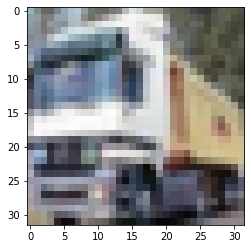

In [74]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [75]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [77]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [78]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(
    preprocessing_function=monochrome,
    rotation_range=180,
    rescale=1/255.0)

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [79]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(
    training_features,
    training_labels,
    batch_size=1,
    shuffle=True)

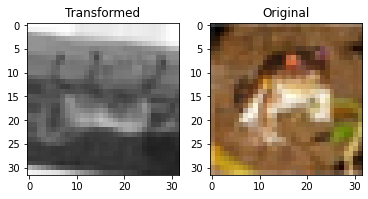

In [80]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [81]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [82]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [83]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [84]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(
    train_path,
    batch_size=64,
    classes=classes,
    target_size=(16, 16))

Found 3027 images belonging to 5 classes.


In [85]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(
    val_path,
    batch_size=64,
    classes=classes,
    target_size=(16, 16))

Found 1296 images belonging to 5 classes.


[0. 0. 0. 0. 1.]


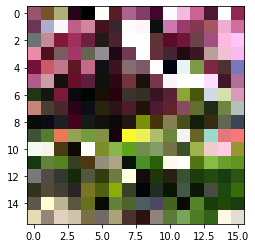

In [86]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [87]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(
    train_path,
    batch_size=64,
    classes=classes,
    target_size=(16, 16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [88]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [89]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [90]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 8)         1544      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 8)           4104      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 4)           516       
                                                                 
 flatten (Flatten)           (None, 16)                0

#### Train the model

In [92]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [93]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)

C:\Users\joaop\AppData\Local\Temp/ipykernel_5992/3624884378.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)


Epoch 1/5
47/47 [==============================] - 14s 246ms/step - loss: 1.6008 - accuracy: 0.2430
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 1.5455 - accuracy: 0.3085
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 1.4650 - accuracy: 0.3685
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 1.3726 - accuracy: 0.4148
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 1.3180 - accuracy: 0.4276


#### Evaluate the model

In [94]:
# Evaluate the model

model.evaluate_generator(val_generator, steps=val_steps)

C:\Users\joaop\AppData\Local\Temp/ipykernel_5992/2964110635.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(val_generator, steps=val_steps)


[1.3304048776626587, 0.41015625]

#### Predict using the generator

In [95]:
# Predict labels with the model

predictions = model.predict_generator(val_generator, steps=1)
print(np.round(predictions, 2))

C:\Users\joaop\AppData\Local\Temp/ipykernel_5992/1282093136.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(val_generator, steps=1)


[[0.2  0.23 0.36 0.04 0.18]
 [0.12 0.18 0.04 0.45 0.2 ]
 [0.26 0.38 0.08 0.18 0.11]
 [0.24 0.32 0.06 0.25 0.12]
 [0.2  0.26 0.11 0.25 0.19]
 [0.05 0.1  0.48 0.01 0.35]
 [0.05 0.11 0.1  0.17 0.57]
 [0.19 0.27 0.05 0.35 0.14]
 [0.14 0.23 0.02 0.48 0.12]
 [0.23 0.28 0.12 0.2  0.17]
 [0.18 0.24 0.19 0.12 0.26]
 [0.13 0.19 0.04 0.48 0.16]
 [0.26 0.32 0.16 0.11 0.15]
 [0.31 0.41 0.08 0.13 0.07]
 [0.34 0.38 0.11 0.09 0.07]
 [0.15 0.23 0.09 0.27 0.26]
 [0.04 0.08 0.01 0.68 0.19]
 [0.08 0.15 0.17 0.16 0.43]
 [0.26 0.37 0.06 0.21 0.1 ]
 [0.1  0.16 0.29 0.07 0.38]
 [0.18 0.24 0.2  0.12 0.25]
 [0.32 0.46 0.03 0.14 0.04]
 [0.21 0.34 0.05 0.28 0.12]
 [0.11 0.16 0.12 0.28 0.33]
 [0.34 0.44 0.05 0.13 0.05]
 [0.02 0.07 0.   0.82 0.08]
 [0.08 0.13 0.02 0.63 0.15]
 [0.24 0.29 0.14 0.18 0.15]
 [0.17 0.34 0.02 0.38 0.08]
 [0.19 0.25 0.14 0.18 0.23]
 [0.04 0.08 0.02 0.65 0.2 ]
 [0.25 0.31 0.1  0.19 0.14]
 [0.11 0.17 0.3  0.06 0.36]
 [0.18 0.25 0.04 0.41 0.13]
 [0.16 0.22 0.06 0.38 0.18]
 [0.17 0.23 0.09 0.2

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [97]:
x = np.zeros((100,10,2,2))

In [98]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [99]:
# Inspect the Dataset object

print(dataset1)
print(dataset1.element_spec)

<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [100]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [101]:
# Try creating a dataset from the tensor x2

# dataset2 = tf.data.Dataset.from_tensor_slices(x2) ---> Fails

In [102]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [103]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [104]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [105]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [106]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [107]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [108]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

3

#### Create a dataset from numpy arrays

In [109]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [110]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [111]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [112]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))

In [113]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

In [114]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare\\tempest.1.1.txt', 'data/shakespeare\\tempest.1.2.txt', 'data/shakespeare\\tempest.2.1.txt', 'data/shakespeare\\tempest.2.2.txt', 'data/shakespeare\\tempest.3.1.txt', 'data/shakespeare\\tempest.3.2.txt', 'data/shakespeare\\tempest.3.3.txt', 'data/shakespeare\\tempest.4.1.txt', 'data/shakespeare\\tempest.5.1.txt']


In [115]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [116]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [117]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [118]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [119]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [120]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare\\tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare\\tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare\\tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare\\tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare\\tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare\\tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare\\tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare\\tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare\\tempest.5.1.txt', shape=(), dtype=string)


In [121]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [122]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

In [124]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [125]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [126]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [127]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [128]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [129]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [130]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 0, 1, 0]",[0],2143,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
1,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",single,"[0, 1, 0, 0]",[0],29,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
2,33,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 1, 0, 0]",[0],2,[1],[1],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
3,47,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 0, 0, 1]",[0],1506,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
4,33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",single,"[0, 0, 0, 1]",[0],1,[0],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no


*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [131]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [132]:
# Convert the DataFrame to a Dataset

bank_dataset = tf.data.Dataset.from_tensor_slices(bank_dataframe.to_dict(orient='list'))

In [133]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [134]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [135]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [136]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [137]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x['y'] = 0 if (x['y'] == tf.constant(b'no', dtype=tf.string)) else 1
    return x

bank_dataset = bank_dataset.map(map_label)

In [138]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [139]:
# Remove the 'marital' column

bank_dataset.map(lambda x: {key: val for key, val in x.items() if key != 'marital'})

<MapDataset shapes: {age: (), job: (12,), education: (4,), default: (1,), balance: (), housing: (1,), loan: (1,), contact: (3,), campaign: (), pdays: (), poutcome: (4,), y: ()}, types: {age: tf.int32, job: tf.int32, education: tf.int32, default: tf.int32, balance: tf.int32, housing: tf.int32, loan: tf.int32, contact: tf.int32, campaign: tf.int32, pdays: tf.int32, poutcome: tf.int32, y: tf.int32}>

In [140]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [141]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [142]:
# Map this function over the dataset

bank_dataset = bank_dataset.map(map_feature_label)

In [143]:
# Inspect the Dataset object

bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [144]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [145]:
# Make training and validation sets from the dataset

training_elements = int(dataset_length * 0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements)

#### Build a classification model

Now let's build a model to classify the features.

In [146]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [147]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [148]:
# Show the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 400)               12400     
                                                                 
 batch_normalization_3 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 400)               160400    
                                                                 
 batch_normalization_4 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                      

#### Train the model

In [149]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(20, drop_remainder=True)
validation_dataset = validation_dataset.batch(100)

In [150]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [151]:
# Fit the model

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
182/182 [==============================] - 8s 28ms/step - loss: 0.6741 - accuracy: 0.6415 - val_loss: 0.6243 - val_accuracy: 0.7358
Epoch 2/5
182/182 [==============================] - 6s 25ms/step - loss: 0.4853 - accuracy: 0.8143 - val_loss: 0.5485 - val_accuracy: 0.7876
Epoch 3/5
182/182 [==============================] - 6s 25ms/step - loss: 0.3801 - accuracy: 0.8896 - val_loss: 0.4489 - val_accuracy: 0.8452
Epoch 4/5
182/182 [==============================] - 6s 25ms/step - loss: 0.3133 - accuracy: 0.9082 - val_loss: 0.3647 - val_accuracy: 0.8765
Epoch 5/5
182/182 [==============================] - 6s 25ms/step - loss: 0.2654 - accuracy: 0.9245 - val_loss: 0.3558 - val_accuracy: 0.8746


Text(0, 0.5, 'Accuracy')

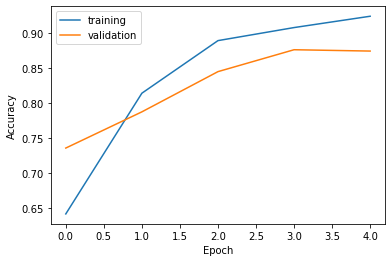

In [152]:
# Plot the training and validation accuracy

plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')